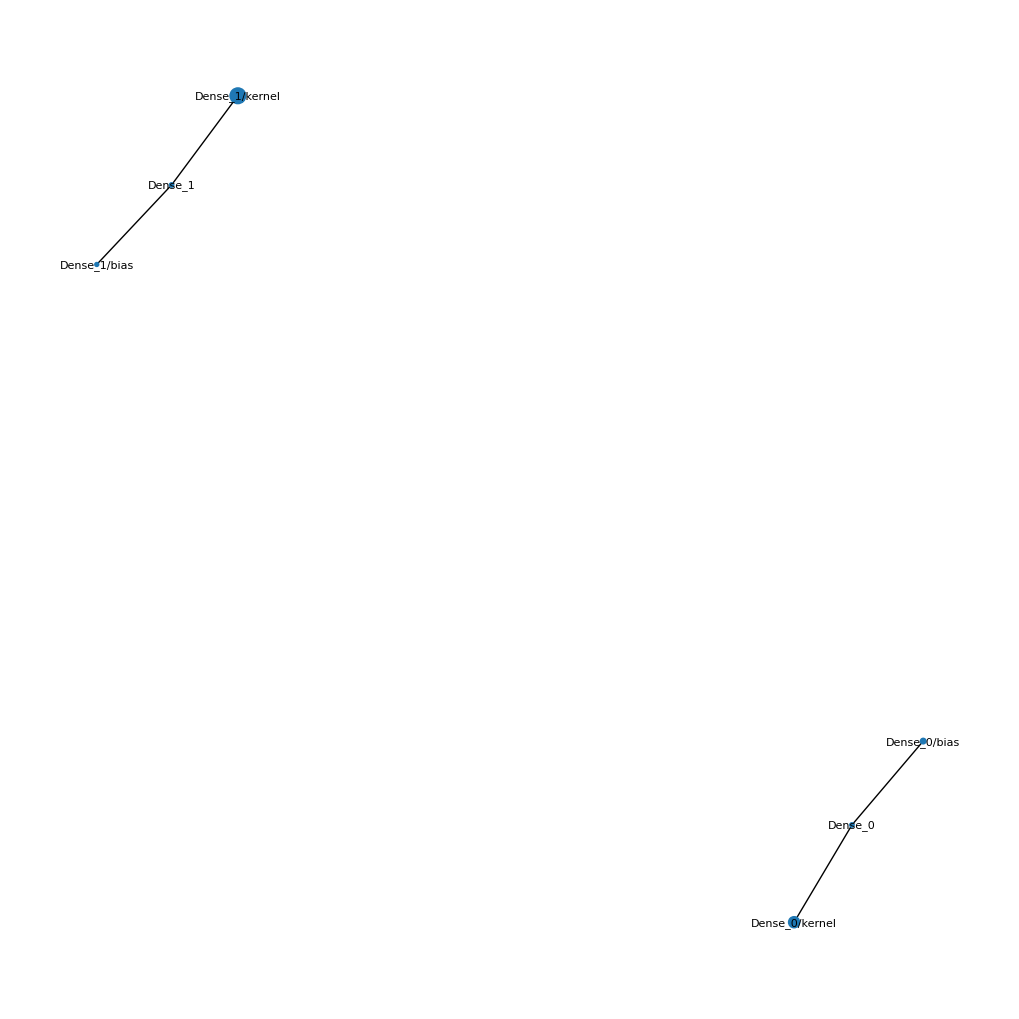

In [3]:
import jax
import jax.numpy as jnp
import flax.linen as nn
import networkx as nx
import matplotlib.pyplot as plt

# Example neural network
class SimpleNN(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(16)(x)  # First layer
        x = nn.relu(x)
        x = nn.Dense(8)(x)   # Second layer
        return x

# Initialize model and parameters
model = SimpleNN()
rng = jax.random.PRNGKey(0)
dummy_input = jnp.ones((1, 4))  # Example input with 4 features
params = model.init(rng, dummy_input)['params']

# Build the graph
G = nx.Graph()

# Add nodes and edges based on the parameter structure
def add_edges_from_params(params, prefix=""):
    for key, value in params.items():
        node_name = f"{prefix}/{key}" if prefix else key
        
        if isinstance(value, dict):  # Nested structure
            add_edges_from_params(value, prefix=node_name)
        else:
            # If value is a tensor-like object, use its size
            G.add_node(node_name, size=value.size)
            # Example: Add edges to connect this node to its prefix
            if prefix:
                G.add_edge(prefix, node_name)

add_edges_from_params(params)

# Visualize the graph
pos = nx.spring_layout(G)  # Layout for visualization
node_sizes = [G.nodes[node].get('size', 10) for node in G.nodes]  # Size based on parameter size

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=8)
plt.show()